In [3]:
import yfinance as yf
import pandas as pd
import matplotlib as plt

In [4]:
ticker = yf.Ticker('TSLA')


In [5]:
x = ticker.history(period = '20y')
x.head()



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2010-06-29,19.00,25.00,17.54,23.89,18766300,0,0
2010-06-30,25.79,30.42,23.30,23.83,17187100,0,0
2010-07-01,25.00,25.92,20.27,21.96,8218800,0,0
2010-07-02,23.00,23.10,18.71,19.20,5139800,0,0
2010-07-06,20.00,20.00,15.83,16.11,6866900,0,0


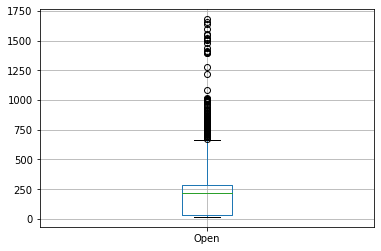

In [6]:
x.boxplot(['Open'])